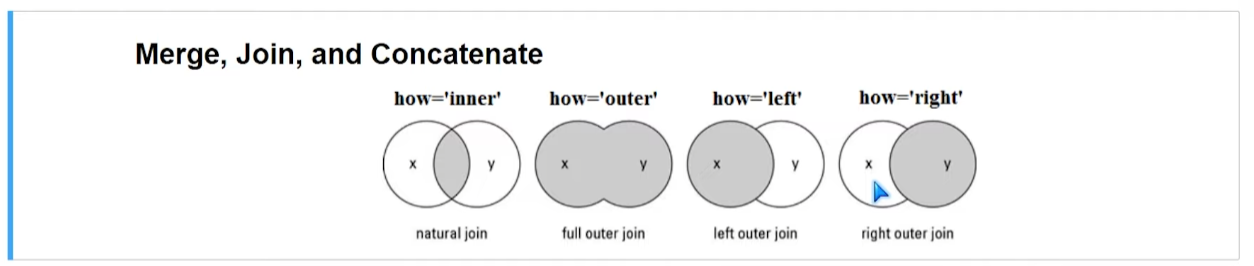

In [1]:
# In this I will be doing in the abstract as I currently only have one excel file in use
# Comes from the tutorial at https://youtu.be/TPivN7tpdwc?si=HyQ1YkY7MtBdErJe

In [2]:
# import pandas as pd

In [3]:
# df1 = pd.read_excel(r"link\to\the\thing.xlsx")   can obviously also read_csv, etc
# df2 = pd.read_excel(r"other\link\thing.xls")

In [4]:
# The video says he uses merge probably more than anything else
# df1.merge(df2) in this example df1 would be our "left" DataFrame and df2 the "right" look above at the picture for reference

#### Inner Join

In [5]:
# By default this is giving us an "inner" join.  i.e. it's going to display the common values between the two
# We can see this is the case by specifying that specific merge
# df1.merge(df2, how = 'inner')
# Furthermore, if we join on a specific column in common, we get a different output.
# df1.merge(df2, how = 'inner', on = "FellowshipID")
# In the example in the video, there are two columns that are "FirstName" and are double up in the merge as "FirstName_x" and "FirstName_y".  This happens because the general join would merge those.
# Because we joined specifically on one column, it duplicated them because they weren't the specified target of the merge
# Additionally, if we were to make a list, and merge on = ["FellowshipID", "FirstName"] we'd get the exact same output as the general merge we originally created.

#### Outer Join

In [6]:
# df1.merge(df2, how = 'outer')
# This gave us all values regardless if they're the same
# Additionally, for values that didn't exist in the "right" DataFrame, null values filled in where there wasn't available data

#### Left Join

In [ ]:
# df1.merge(df2, how = 'left')  This is going to pull everything from the left, and *try* to pull everything from the right, but only if it is able to merge.
# In this case it pulled the things in common and (excluding a few characters that weren't in common) and then pulled the "age" column which was unique to the right side

#### Right Join

In [7]:
# df1.merge(df2, how = 'right') basically the exact opposite.  It'll join on anything that can be merged, but pull in the unique values from the left side set, essentially pulling in "skills"

#### Cross Join (rarer)

In [ ]:
# df1.merge(df2, how = 'cross')  This basically pulls each value from the left DataFrame, and then lists it alongside each of the values from the right side.

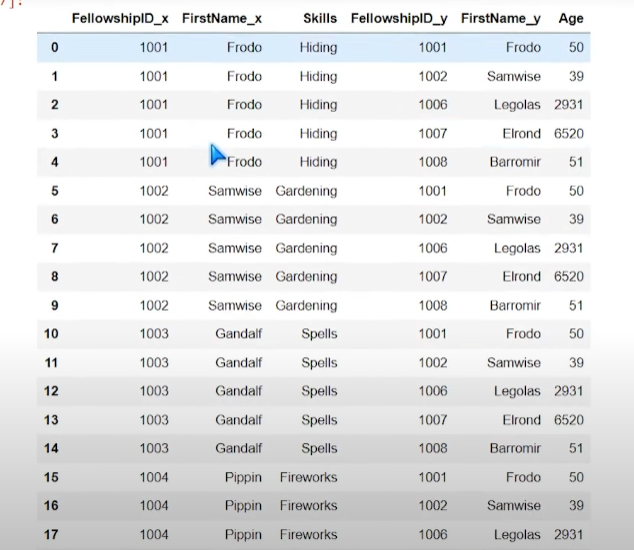

In [8]:
# Not a lot of uses for this.

#### Join

In [9]:
# Not as easily understood as merge, can feel complicated
# df1.join(df2)
# This threw an error, because data overlaps but no suffix was specified, essentially it saw the overlap but couldn't destinguish.  
# df1.join(df2, on = 'FellowshipID")  Throws same error
# df1.join(df2, on = 'FellowshipID", how = outer) still errors
# df1.join(df2, on = 'FellowshipID", how = outer, lsuffix = '-Left', rsuffix='_Right') this works, but essentially creates one big DataFrame with nulls all over the place, see below.

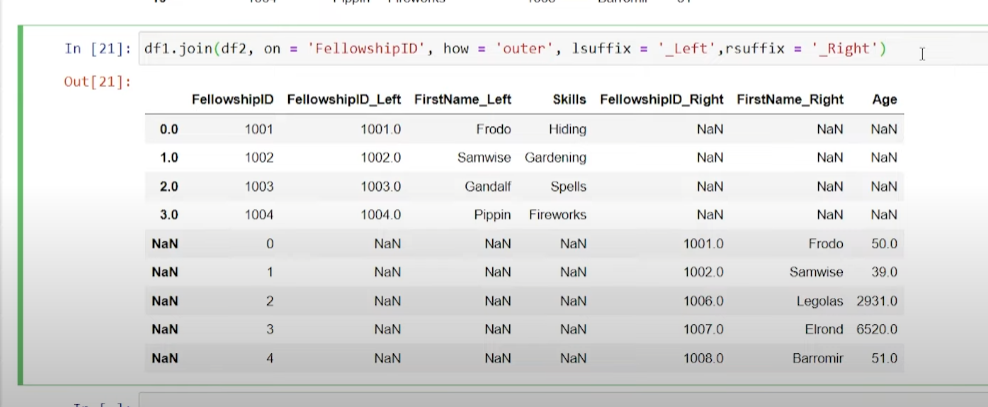

In [10]:
# join works better when working with indexes
# df4 = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'), lsuffix = '-Left', rsuffix='_Right')
# We essentially set the Fellowship ID column in both as the index, and that joined us on those columns, and the result looks much like the merge from above, except that FellowshipID is an index
# We can still specify outer/inner etc.  Join can still get the job done, but usually needs more work.

#### Concatenate

In [13]:
# pd.concat([df1, df2])
# This essentially stacked the left frame on top of the right frame, null values existing where there isn't any overlap
# Remember 0 axis is the left index and 1 axis is the top index, so you can specify that by setting it in the concat
# We can do a join within the concat
# pd.concat([df1, df2], join = 'inner')  which then took the columns that were the same, and the ones that were different, they didn't take
# pd.concat([df1, df2], join = 'outer')  it took all of them - but left null values throughout, repeating the common items in the columns.  See image:

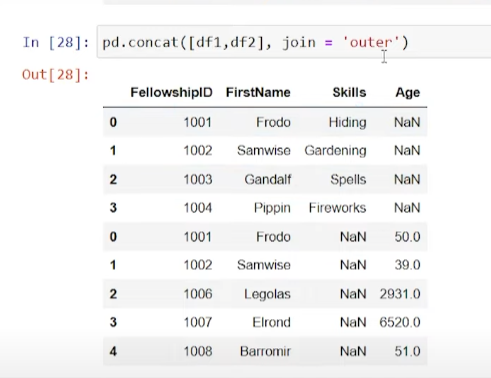

#### Append (again, rare)

In [ ]:
# df1.append(df2)
# This kicked a deprecation highlight, because it's on it's way out anyway.